# Capstone Project - App Store Data
## Albatool and Raghad

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### <b> Part 1: Project Proposal Criteria 
#### Prepare an Abstract as both a Document and a PowerPoint (Start with 3 to 6 project ideas)

* Read the data

In [2]:
df = pd.read_csv("data/AppleStore.csv") #pd.read_csv("app-store-apple-data-set-10k-apps/AppleStore.csv")

In [3]:
df.head(2)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1


####  - Check for nulls

In [4]:
df.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

####  - Drop <b>Unnamed: 0</b> column

In [5]:
df = df.drop(columns = 'Unnamed: 0')

#### - Convert size from Bytes to MB

In [6]:
df['size_MB'] = df['size_bytes'] / (1024 * 1024.0)

####  - Free/paid flag

In [7]:
df['isFree'] = np.where(df['price']==0, 'Free', 'Paid')

In [8]:
df.head(2)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_MB,isFree
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,96.119141,Paid
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,151.232422,Free


Let's talk about prices!
#### - What's the avg price for apps ?
    - There are outliars in the data. To identify them, we will boxplot the price data and see what are the outliars.

In [9]:
df['price'].describe()

count    7197.000000
mean        1.726218
std         5.833006
min         0.000000
25%         0.000000
50%         0.000000
75%         1.990000
max       299.990000
Name: price, dtype: float64

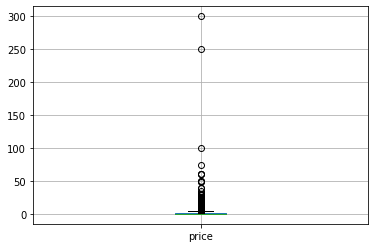

In [10]:
boxplot = df.boxplot(column=['price'])

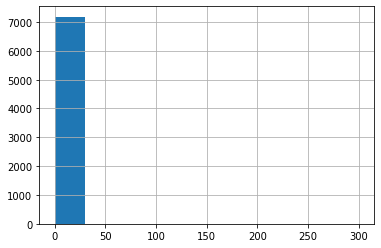

In [45]:
hist = df['price'].hist()

Let's see how many apps do we have that are above 30$

In [11]:
df[df['price']>30].count()

id                  13
track_name          13
size_bytes          13
currency            13
price               13
rating_count_tot    13
rating_count_ver    13
user_rating         13
user_rating_ver     13
ver                 13
cont_rating         13
prime_genre         13
sup_devices.num     13
ipadSc_urls.num     13
lang.num            13
vpp_lic             13
size_MB             13
isFree              13
dtype: int64

We only have 13 apps! If we draw a boxplot on data that is <b> less </b> than 30$

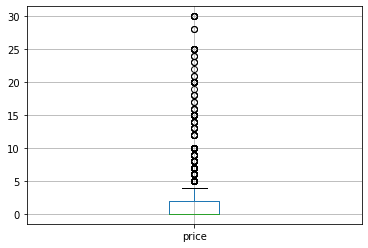

In [12]:
boxplot = df[df['price']<30].boxplot(column=['price'])

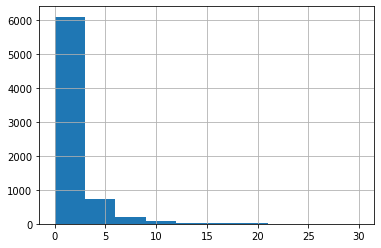

In [46]:
hist = df[df['price']<30].price.hist()

ok there are still outliars when plotting apps that are less than 30$. Seems like the box stops at 5. so let's see the data

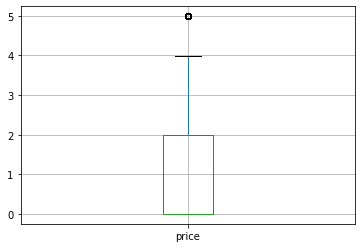

In [42]:
boxplot = df[df['price']<5].boxplot(column=['price'])

There are still outliars. Let's see how many apps there is that are less than 5$

In [43]:
df[df['price']>=5].price.describe()

count    438.000000
mean      12.222877
std       20.145140
min        5.990000
25%        6.990000
50%        7.990000
75%        9.990000
max      299.990000
Name: price, dtype: float64

In [14]:
df[df['price']<5].count()[0]

6759

In [44]:
df[df['price']<5].price.describe()

count    6759.000000
mean        1.046008
std         1.543686
min         0.000000
25%         0.000000
50%         0.000000
75%         1.990000
max         4.990000
Name: price, dtype: float64

In [21]:
print("percentage of apps that are less than 5$ is: %{0:.2f}".format((df[df['price']>=5].count()[0]/df[df['price']<5].count()[0])*100))

percentage of apps that are less than 5$ is: %6.48


~ 6.5%! seems like a lot. We will stick to the apps that are less than <b><i> $30 </i></b>

#### we will use only the data with price less than 30$

In [47]:
df = df[df['price']<30]

In [48]:
df.head(3)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_MB,isFree
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,96.119141,Paid
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,151.232422,Free
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,95.867188,Free


####  -  What's the Average price now after removing apps that are more than $30

In [20]:
#-- the average is:
print("Average price is: ${0:.2f}".format(df['price'].mean()))

Average price is: $1.73


####  - Let's compare the number of <b>free</b> vs <b>paid</b>

In [22]:
price_df = pd.DataFrame({"number_of_apps":  [df[df['isFree']=='Free']["id"].count(), df[df['isFree']=='Paid']["id"].count()]
                        ,"price":["Free", "Paid"]
                        })

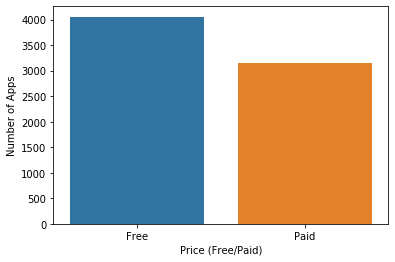

In [23]:
plt.figure()
sns.barplot(x=price_df["price"],y=price_df['number_of_apps'])
plt.gca().set_xlabel("Price (Free/Paid)")
plt.gca().set_ylabel("Number of Apps")
plt.show()

Free apps are more than paid!

#### - Content vs. prices 

In [24]:
df.groupby(["cont_rating",'isFree'])['id'].count()

cont_rating  isFree
12+          Free       705
             Paid       450
17+          Free       447
             Paid       175
4+           Free      2466
             Paid      1967
9+           Free       438
             Paid       549
Name: id, dtype: int64

In [25]:
g1 = df.groupby(["cont_rating",'isFree'])['id'].count().unstack().reset_index()
g1 = g1.set_index("cont_rating")
g1

isFree,Free,Paid
cont_rating,,
12+,705,450
17+,447,175
4+,2466,1967
9+,438,549


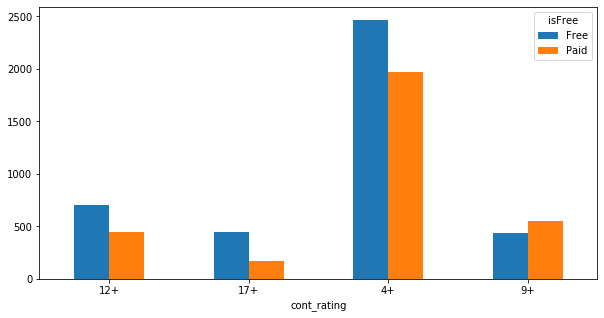

In [26]:
ax = g1.plot.bar(rot=0,figsize=(10,5))

We see that apps that are that are rated 4+ are more in number.

Surprisingly, apps that are 9+ are more when it comes to paid apps!

####  - content (age) distribution

In [30]:
df.groupby("cont_rating")['id'].count()

cont_rating
12+    1155
17+     622
4+     4433
9+      987
Name: id, dtype: int64

#### - number of categories

In [31]:
df.groupby("prime_genre")['id'].count()

prime_genre
Book                  112
Business               57
Catalogs               10
Education             453
Entertainment         535
Finance               104
Food & Drink           63
Games                3862
Health & Fitness      180
Lifestyle             144
Medical                23
Music                 138
Navigation             46
News                   75
Photo & Video         349
Productivity          178
Reference              64
Shopping              122
Social Networking     167
Sports                114
Travel                 81
Utilities             248
Weather                72
Name: id, dtype: int64

####  - categories vs. price: top categories and does price affect it popularities? (Is free more popular?)

In [32]:
genre_and_price_vs_raing_df = df.groupby(["prime_genre",'isFree'])['user_rating'].mean().unstack()
genre_and_price_vs_raing_df = genre_and_price_vs_raing_df.reset_index()
genre_and_price_vs_raing_df = genre_and_price_vs_raing_df.set_index("prime_genre")

In [33]:
genre_and_price_vs_raing_df = genre_and_price_vs_raing_df.sort_values(by = 'Paid', ascending=False) 

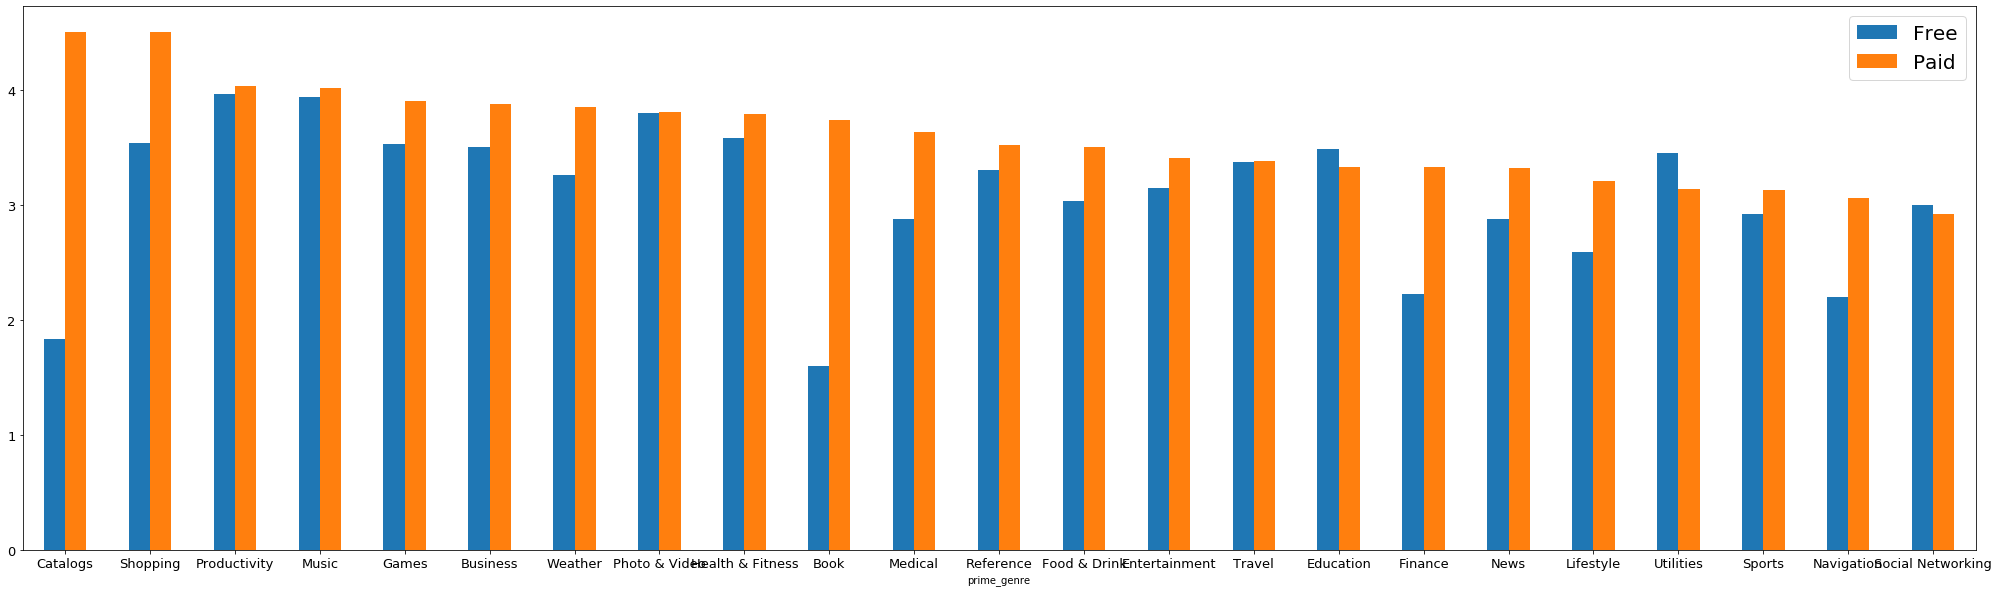

In [43]:
ax = genre_and_price_vs_raing_df.plot.bar(rot = 0, figsize = (35, 10),fontsize = 13)
ax.legend(fontsize = 20)

####  - paid apps and user rating. Is the money worth it?

In [35]:
price_vs_raing_df = df.groupby('price')['user_rating'].mean().to_frame(name = 'Average Rating').reset_index()

In [36]:
price_vs_raing_df

,price,Average Rating
0,0.00,3.376726
1,0.99,3.464286
2,1.99,3.737520
3,2.99,3.891654
4,3.99,3.796029
5,4.99,3.836294
6,5.99,3.423077
7,6.99,4.009036
8,7.99,3.469697
9,8.99,4.166667


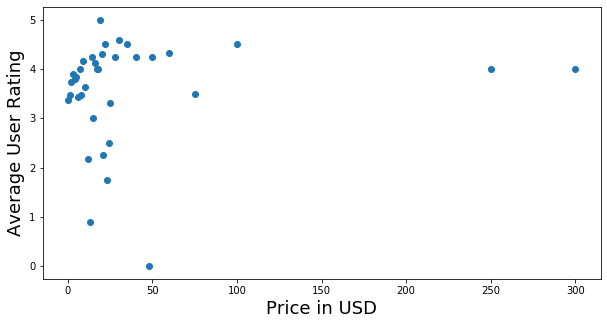

In [47]:
plt.figure(figsize=(10, 5))
plt.scatter(price_vs_raing_df['price'], price_vs_raing_df['Average Rating'])
plt.gca().set_xlabel("Price in USD", fontsize=18)
plt.gca().set_ylabel("Average User Rating", fontsize=18)
plt.show()

- size and categories distribution

In [49]:
genre_and_price_vs_size_df = df.groupby(["prime_genre",'isFree'])['size_MB'].mean().unstack()
genre_and_price_vs_size_df = genre_and_price_vs_size_df.reset_index()
genre_and_price_vs_size_df = genre_and_price_vs_size_df.set_index("prime_genre")

In [50]:
genre_and_price_vs_size_df = genre_and_price_vs_size_df.sort_values(by = 'Paid', ascending=False) 

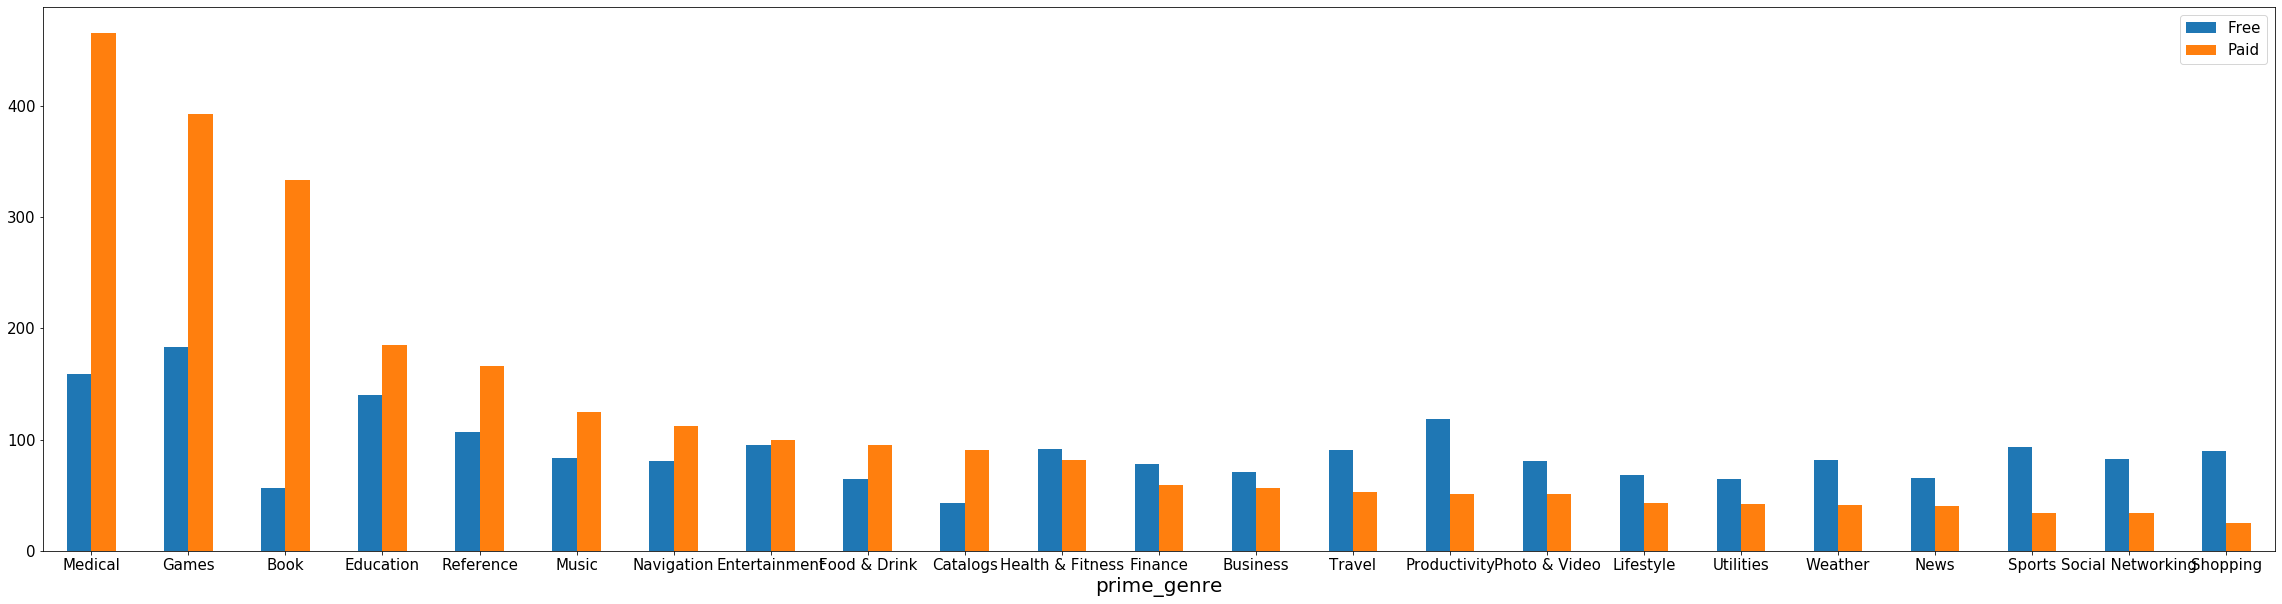

In [51]:
ax = genre_and_price_vs_size_df.plot.bar(rot = 0, figsize = (40, 10), fontsize=15)
ax.legend(fontsize = 15)
ax.xaxis.label.set_size(20)

In [165]:
genre_vs_size_df = df.groupby(["prime_genre"])['size_MB'].mean().to_frame(name = 'Average Size in MB').reset_index()
genre_vs_size_df = genre_vs_size_df.sort_values(by = 'Average Size in MB', ascending=False) 

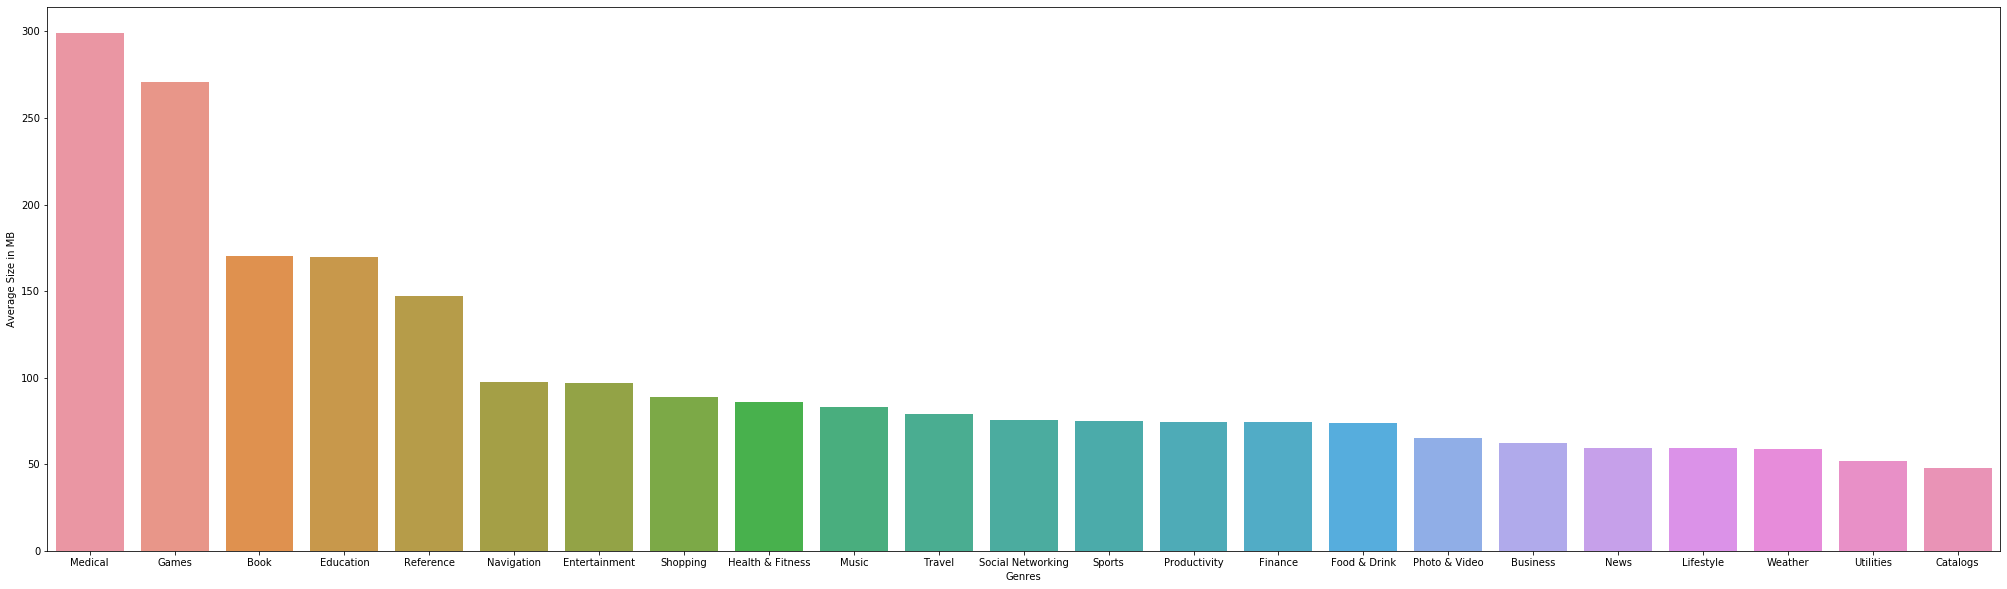

In [166]:
plt.figure(figsize=(35, 10))
sns.barplot(x=genre_vs_size_df["prime_genre"],y=genre_vs_size_df['Average Size in MB'], ) #, palette="Blues_d"
plt.gca().set_xlabel("Genres")
plt.gca().set_ylabel("Average Size in MB")
plt.show()

### <b>Part 2: Perform Exploratory Data Analysis, Visualizations, and Feature Engineering

### <b>Part 3: Perform Machine Learning, Performance Metrics, and Deployment for your project

### <b>Part 4: Present your project as a Presentation to your business stakeholders

### <b>Part 5: Submit your project for your Advisors and business stakeholders